In [17]:
pip install scikit-fuzzy


Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install paho-mqtt

Note: you may need to restart the kernel to use updated packages.


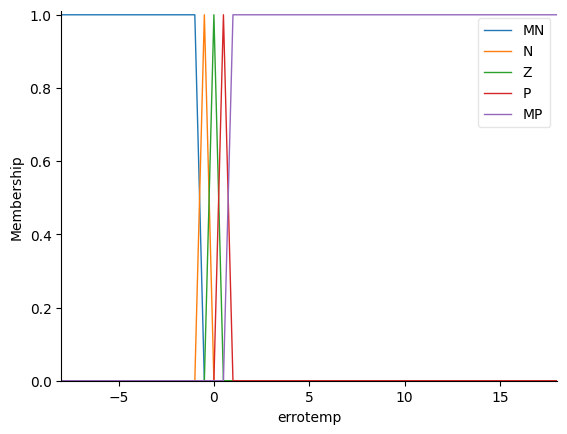

In [84]:
import numpy as np
import skfuzzy as fuzz
import paho.mqtt.client as mqtt
from skfuzzy import control as ctrl
import time

#mqttBroker ="test.mosquitto.org"
#client = mqtt.Client("c213Inatelsbm")
#client.connect(mqttBroker)

# New Antecedent/Consequent objects hold universe variables and membership
# functions
errotemp = ctrl.Antecedent(np.arange(-8, 18.1, 0.1), 'errotemp')
varerrotemp =ctrl.Antecedent(np.arange(-1, 1.01, 0.01), 'varerrotemp')
refrigerador =ctrl.Consequent(np.arange(0, 101, 1), 'refrigerador')


# Custom membership functions can be built interactively with a familiar,
# Pythonic API
errotemp['MN'] = fuzz.trapmf(errotemp.universe, [-8, -8, -1, -0.5])
errotemp['N'] = fuzz.trimf(errotemp.universe, [-1, -0.5, 0])
errotemp['Z'] = fuzz.trimf(errotemp.universe, [-0.5, 0, 0.5])
errotemp['P'] = fuzz.trimf(errotemp.universe, [0, 0.5, 1])
errotemp['MP'] = fuzz.trapmf(errotemp.universe,[0.5, 1, 18, 18])
# You can see how these look with .view()
errotemp.view()

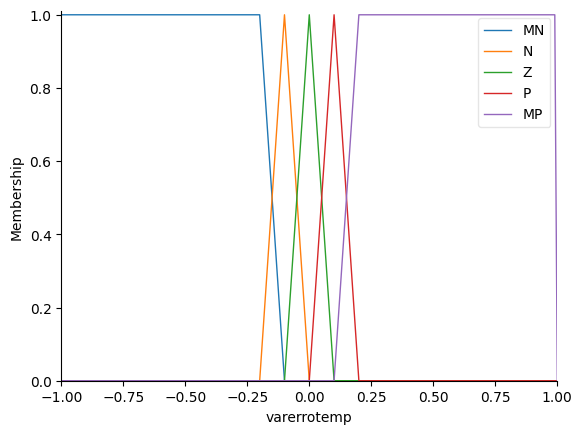

In [85]:
varerrotemp['MN'] = fuzz.trapmf(varerrotemp.universe, [-1, -1, -0.2,-0.1])
varerrotemp['N'] = fuzz.trimf(varerrotemp.universe, [-0.2,-0.1,0])
varerrotemp['Z'] = fuzz.trimf(varerrotemp.universe, [-0.1, 0, 0.1])
varerrotemp['P'] = fuzz.trimf(varerrotemp.universe, [0, 0.1, 0.2])
varerrotemp['MP'] = fuzz.trapmf(varerrotemp.universe,[0.1, 0.2, 1, 1])
# You can see how these look with .view()
varerrotemp.view()

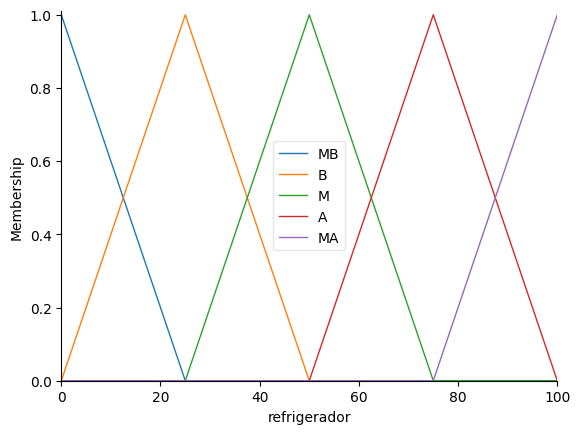

In [86]:
refrigerador['MB'] = fuzz.trimf(refrigerador.universe, [0, 0, 25])        # MUITO BAIXO
refrigerador['B'] = fuzz.trimf(refrigerador.universe, [0, 25, 50])        # BAIXO
refrigerador['M'] = fuzz.trimf(refrigerador.universe, [25, 50, 75])     # MÉDIO
refrigerador['A'] = fuzz.trimf(refrigerador.universe, [50, 75, 100])    # ALTO
refrigerador['MA'] = fuzz.trimf(refrigerador.universe, [75, 100, 100])  # MUITO ALTO
refrigerador.view()

In [87]:
regra1 = ctrl.Rule(errotemp['MN']& varerrotemp['MN'], refrigerador['MB'])
regra2 = ctrl.Rule(errotemp['N']& varerrotemp['MN'], refrigerador['MB'])
regra3 = ctrl.Rule(errotemp['Z']& varerrotemp['MN'], refrigerador['MB'])
regra4 = ctrl.Rule(errotemp['P']& varerrotemp['MN'], refrigerador['A'])
regra5 = ctrl.Rule(errotemp['MP']& varerrotemp['MN'], refrigerador['A'])
regra6 = ctrl.Rule(errotemp['MN']& varerrotemp['N'], refrigerador['MB'])
regra7 = ctrl.Rule(errotemp['N']& varerrotemp['N'], refrigerador['B'])
regra8 = ctrl.Rule(errotemp['Z']& varerrotemp['N'], refrigerador['B'])
regra9 = ctrl.Rule(errotemp['P']& varerrotemp['N'], refrigerador['M'])
regra10 = ctrl.Rule(errotemp['MP']& varerrotemp['N'], refrigerador['A'])
regra11 = ctrl.Rule(errotemp['MN']& varerrotemp['Z'], refrigerador['MB'])
regra12 = ctrl.Rule(errotemp['N']& varerrotemp['Z'], refrigerador['MB'])
regra13 = ctrl.Rule(errotemp['Z']& varerrotemp['Z'], refrigerador['M'])
regra14 = ctrl.Rule(errotemp['P']& varerrotemp['Z'], refrigerador['MA'])
regra15 = ctrl.Rule(errotemp['MP']& varerrotemp['Z'], refrigerador['MA'])
regra16 = ctrl.Rule(errotemp['MN']& varerrotemp['P'], refrigerador['B'])
regra17 = ctrl.Rule(errotemp['N']& varerrotemp['P'], refrigerador['M'])
regra18 = ctrl.Rule(errotemp['Z']& varerrotemp['P'], refrigerador['A'])
regra19 = ctrl.Rule(errotemp['P']& varerrotemp['P'], refrigerador['A'])
regra20 = ctrl.Rule(errotemp['MP']& varerrotemp['P'], refrigerador['MA'])
regra21 = ctrl.Rule(errotemp['MN']& varerrotemp['MP'], refrigerador['B'])
regra22 = ctrl.Rule(errotemp['N']& varerrotemp['MP'], refrigerador['B'])
regra23 = ctrl.Rule(errotemp['Z']& varerrotemp['MP'], refrigerador['MA'])
regra24 = ctrl.Rule(errotemp['P']& varerrotemp['MP'], refrigerador['MA'])
regra25 = ctrl.Rule(errotemp['MP']& varerrotemp['MP'], refrigerador['MA'])

In [88]:
refrigerador_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5,regra6, regra7, regra8,regra9,regra10,regra11, regra12, regra13,regra14,regra15,regra16, regra17, regra18,regra19,regra20,regra21, regra22, regra23,regra24,regra25])
potencia = ctrl.ControlSystemSimulation(refrigerador_ctrl)

In [91]:
sp=6
tempatual=10
print(tempatual)
erroatual=4
while True: 
  erroanterior=erroatual
  erroatual=tempatual-sp
  varerroTemp=erroatual-erroanterior
  potencia.input['errotemp'] =erroatual
  potencia.input['varerrotemp'] =varerroTemp
  potencia.compute()
  i=0
  while (i < 10):
    tempatual=tempatual * 0.9952 - potencia.output['refrigerador'] * 0.0003963
    time.sleep(0.001)
    i += 1
  print(tempatual)
  #client.publish("refrigerador/Temperatura", tempatual)
  #client.publish("refrigerador/erro", erroatual)

10
9.174708538541172
8.452827695035545
7.764858186057946
7.10920698054263
6.484355882225007
5.896130179159813
5.5856758242313695
5.290150231293564
5.005307355924552
4.73785191675914
4.482964164036188
4.240050110196435
4.008547274448183
3.7879195993000123
3.577656209290311
3.3772702280271685
3.1862976507994367
3.004054683588158
2.82974897833796
2.6627993431689707
2.5027365179273864
2.349162496265338
2.201729110797344
2.0610468325056357
1.9281032895944867
1.802568817392724
1.683891286129462
1.5715174272489412
1.4649321656617884
1.3636627688377112
1.2672769981446856
1.1753834761609503
1.087651055287475
1.0038031973000405
0.9236015000869348
0.8468358346324153
0.7733180295187928
0.7028775599671291
0.6353584662224053
0.5706170693809324
0.5085202276448851
0.44894397195630203
0.3917724158517848
0.33689686849716344
0.28421510151460566
0.2336307344137262
0.18505271301355586
0.1389054847452852
0.09534992230869618
0.05427883251006133
0.015543599607064959
-0.02100277426160096
-0.055498327063474635
